<a href="https://colab.research.google.com/github/stefanoridolfi/Coding_ML/blob/master/MLP_1_hidden_3_output_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

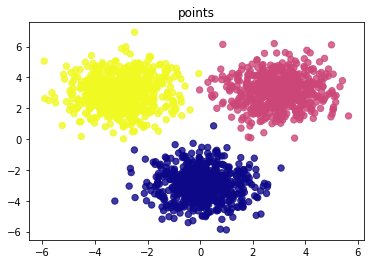

Epoch= 0    Loss function value:  0.2822209948688396
Epoch= 20    Loss function value:  0.012911339438668701
Epoch= 40    Loss function value:  0.006142215631112664
Epoch= 60    Loss function value:  0.0039715895236849055
Epoch= 80    Loss function value:  0.003046708574623132
Epoch= 100    Loss function value:  0.0025910164920093007
Epoch= 120    Loss function value:  0.002310926463614478
Epoch= 140    Loss function value:  0.002088866382390819
Epoch= 160    Loss function value:  0.0018932748550353714
Epoch= 180    Loss function value:  0.0017213956713782752
Epoch= 200    Loss function value:  0.0015729306296445407
Epoch= 220    Loss function value:  0.0014454970648751842
Epoch= 240    Loss function value:  0.00133581139862231
Epoch= 260    Loss function value:  0.0012407209337524396
Epoch= 280    Loss function value:  0.001157562127554305
Epoch= 300    Loss function value:  0.001084192166146698
Epoch= 320    Loss function value:  0.0010189158656421361
Epoch= 340    Loss function valu

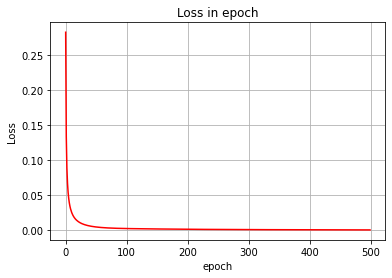

In [189]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

l=600
cat_images = np.random.randn(l, 2) + np.array([0, -3])
mouse_images = np.random.randn(l, 2) + np.array([3, 3])
dog_images = np.random.randn(l, 2) + np.array([-3, 3])
feature_set = np.vstack([cat_images, mouse_images, dog_images])
labels = np.array([0]*l + [1]*l + [2]*l)


one_hot_labels = np.zeros((l*3, 3))
for i in range(l*3):
    one_hot_labels[i, labels[i]] = 1
dataset=np.concatenate((feature_set,one_hot_labels),axis=1)



plt.scatter(dataset[:,0], dataset[:,1], c=labels,cmap='plasma', s=40, alpha=0.8)
plt.title("points")
plt.show()
np.random.shuffle(dataset)

#----------------------------------#
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_der(x):
    return sigmoid(x) *(1-sigmoid (x))

def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum()
    

instances = dataset.shape[0]
attributes = 2
hidden_nodes = 4
output_labels = 3

# wh=[2,hid]
# bh=[hid,1]

wh = np.random.rand(attributes,hidden_nodes)
bh = np.random.randn(1,hidden_nodes)

# wo=[hid,m]
#bo=[1,1]
wo = np.random.rand(hidden_nodes,output_labels)
bo = np.random.randn(1,output_labels)
lr = 0.01

error_cost = []
epoch_list=[]

for epoch in range(500):
  epoch_list.append(epoch)
############# feedforward

  for i in range(instances):
    #Y=one_hot_labels[i,:]
    Y=dataset[i,2:5]
    Y=np.array(Y)
    Y=Y.reshape(1,3)
    X=dataset[i,0:2]
    X=np.array(X)
    X=X.reshape(1,attributes)
  
    # Phase 1
    zh = np.dot(X, wh) + bh
    zh=zh.reshape(1,hidden_nodes)
    ah = sigmoid(zh)
    
    # Phase 2
    zo = np.dot(ah, wo) + bo
    ao = softmax(zo)
    #print("zo=",zo,"   ao=",ao, "one-hot label[i]",one_hot_labels[i])
   
  
########## Back Propagation

########## Phase 1
    dcost_dzo = ao - Y
    dzo_dwo = ah

    dcost_wo = np.dot(dzo_dwo.T, dcost_dzo)

    dcost_bo = dcost_dzo

########## Phases 2

    dzo_dah = wo
    dcost_dah = np.dot(dcost_dzo , dzo_dah.T)
    dah_dzh = sigmoid_der(zh)
   
    dzh_dwh = X
    
    dcost_wh = np.dot(dzh_dwh.T, dah_dzh * dcost_dah)

    dcost_bh = dcost_dah * dah_dzh
   
    # Update Weights ================

    wh -= lr * dcost_wh
    bh -= lr * dcost_bh

    wo -= lr * dcost_wo
    bo -= lr * dcost_bo
  
    loss =(-Y* np.log(ao)).sum()
    
  
  #print("fine epoch", epoch, '    Loss function value: ', loss)
  error_cost.append(loss)
  if epoch % 20 == 0:
    print("Epoch=",epoch, '   Loss function value: ', loss)

fig, ax = plt.subplots()
ax.plot(epoch_list, error_cost, c='red')
ax.set(xlabel='epoch', ylabel='Loss',
       title='Loss in epoch')
plt.grid(True)
plt.show()
    
    